# 1 Import libraries and data

In [1]:
from rbm import RBM
from dbn import DeepBeliefNetwork
from autoencoder_rbm import Autoencoder_RBM
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data


In [2]:
# Download the data in the working directory
mnist = input_data.read_data_sets("../data/mnist/", one_hot=True)

#training_data = {image: mnist.train.images, label: mnist.train.labels}
#validation_data = {image: mnist.validation.images, label: mnist.validation.labels}
#test_data = {image: mnist.test.images, label: mnist.test.labels}
train_dataset = mnist.train.images
train_labels = mnist.train.labels
validation_dataset = mnist.validation.images
validation_labels = mnist.validation.labels
test_dataset = mnist.test.images
test_labels = mnist.test.labels
print("The shape of the dataset for training: ", train_dataset.shape, train_labels.shape)
print("The shape of the dataset for validation: ", validation_dataset.shape, validation_labels.shape)
print("The shape of the dataset for test: ", test_dataset.shape, test_labels.shape)

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz
The shape of the dataset for training:  (55000, 784) (55000, 10)
The shape of the dataset for validation:  (5000, 784) (5000, 10)
The shape of the dataset for test:  (10000, 784) (10000, 10)


# 2 DBN Classification

In [7]:
dbn_model_1 = DeepBeliefNetwork(
        name='dbn',
        rbm_layers=[40, 10],
        rbm_gauss_visible=True,
        finetune_num_epochs=8,
        do_pretrain=False)

accuracy_summary_1, loss_summary_1 = dbn_model_1.fit(train_dataset, train_labels, validation_dataset, validation_labels, test_dataset, test_labels)

Iter 1:  Training: current loss 2.294687 | current accuracy 0.162691 || Validation: current loss 2.294428 | current accuracy 0.169600 || Test: accuracy 0.162600
Iter 2:  Training: current loss 2.099539 | current accuracy 0.371018 || Validation: current loss 2.096321 | current accuracy 0.374400 || Test: accuracy 0.372600
Iter 3:  Training: current loss 1.338371 | current accuracy 0.543818 || Validation: current loss 1.325229 | current accuracy 0.554200 || Test: accuracy 0.536600
Iter 4:  Training: current loss 0.983126 | current accuracy 0.696436 || Validation: current loss 0.963687 | current accuracy 0.713800 || Test: accuracy 0.697100
Iter 5:  Training: current loss 0.770958 | current accuracy 0.785145 || Validation: current loss 0.751765 | current accuracy 0.794400 || Test: accuracy 0.790600
Iter 6:  Training: current loss 0.623617 | current accuracy 0.834218 || Validation: current loss 0.605518 | current accuracy 0.841800 || Test: accuracy 0.839000
Iter 7:  Training: current loss 0.

In [6]:
dbn_model_2 = DeepBeliefNetwork(
        name='dbn',
        rbm_layers=[40, 10],
        rbm_num_epochs=[5],
        rbm_gauss_visible=True,
        finetune_num_epochs=8,
        do_pretrain=True)

accuracy_summary_2, loss_summary_2 = dbn_model_2.fit(train_dataset, train_labels, validation_dataset, validation_labels, test_dataset, test_labels)

hidden layer 1 has been pretrained
hidden layer 2 has been pretrained
Iter 1:  Training: current loss 0.929999 | current accuracy 0.774382 || Validation: current loss 0.921388 | current accuracy 0.780800 || Test: accuracy 0.782300
Iter 2:  Training: current loss 0.621513 | current accuracy 0.842491 || Validation: current loss 0.608978 | current accuracy 0.849600 || Test: accuracy 0.844900
Iter 3:  Training: current loss 0.479764 | current accuracy 0.878800 || Validation: current loss 0.463369 | current accuracy 0.887600 || Test: accuracy 0.880600
Iter 4:  Training: current loss 0.403963 | current accuracy 0.896527 || Validation: current loss 0.386044 | current accuracy 0.904600 || Test: accuracy 0.897300
Iter 5:  Training: current loss 0.356357 | current accuracy 0.906982 || Validation: current loss 0.339548 | current accuracy 0.913600 || Test: accuracy 0.909600
Iter 6:  Training: current loss 0.323489 | current accuracy 0.914582 || Validation: current loss 0.307826 | current accuracy 

# 3 Autoencoder

In [8]:
# Test for autoencoder
autoencoder_1 = Autoencoder_RBM(
       rbm_layers=[50, 10],
       rbm_gauss_visible=True,
       finetune_num_epochs=10,
       finetune_loss_func='mse',
       do_pretrain=False,
       tied_weights=False)

compression_1, reconstruction_1, loss_summary_1 = autoencoder_1.fit(train_dataset, validation_set=validation_dataset, test_set=test_dataset)

Iter 1: Training set: current loss 0.258521  ||  Validation set: current loss 0.259372
Validation:  [3106 1367 1999 1466 2009 3607 1448 3370 1963 4270  121 3776 3698 2019 4653
 2257 1995 4462 3376  464 4245 1420  872 1371 4203]
Iter 2: Training set: current loss 0.258278  ||  Validation set: current loss 0.259162
Validation:  [3106 1367 1466 1999 3607 2009 1448 3370 4270  121 1963 3776 3698 2019 2257
 4653  464 3376 1995 4462 4245  872 1420 4863 4203]
Iter 3: Training set: current loss 0.258242  ||  Validation set: current loss 0.259149
Validation:  [3106 1466 1367 1999 3607 2009 1448 3370 4270  121 1963 3776 3698 2019 2257
 4653  464 3376 1995  872 4462 4245 1420 4863 4203]
Iter 4: Training set: current loss 0.258163  ||  Validation set: current loss 0.259163
Validation:  [3106 1466 1367 1999 3607 2009 1448 3370 4270  121 1963 3776 3698 2019 2257
 4653  464 1995 3376 4462  872 4245 1420 4863 4203]
Iter 5: Training set: current loss 0.258073  ||  Validation set: current loss 0.259169
V

In [9]:
# Test for autoencoder
autoencoder_2 = Autoencoder_RBM(
       rbm_layers=[50, 10],
       rbm_num_epochs=[5],
       rbm_gauss_visible=True,
       finetune_num_epochs=10,
       finetune_loss_func='mse',
       do_pretrain=True,
       tied_weights=False)

compression_2, reconstruction_2, loss_summary_2 = autoencoder_2.fit(train_dataset, validation_set=validation_dataset, test_set=test_dataset)

hidden layer 1 has been pretrained
hidden layer 2 has been pretrained
Iter 1: Training set: current loss 0.202469  ||  Validation set: current loss 0.202530
Validation:  [4909 4767 4797 2019 4727 1448 4801 3362 3607 4114 3382 4761 1420 2773 4875
  875 1618 4885 4226 4841 1480 2748  670 4360 1466]
Iter 2: Training set: current loss 0.201735  ||  Validation set: current loss 0.201781
Validation:  [4909 4767 4797 4727 2019 3362 4801 1448 3607 4114 4761 3382 1420 4875  875
 2773 4885 1618 4226 4841 2748 1480  670 4360 1466]
Iter 3: Training set: current loss 0.201159  ||  Validation set: current loss 0.201208
Validation:  [4909 4767 4797 3362 2019 4727 4801 1448 3607 4114 3382 4761 4875  875 4885
 1420 4226 2773 4841 1618 2748  670 1480 4360 3266]
Iter 4: Training set: current loss 0.200640  ||  Validation set: current loss 0.200678
Validation:  [4909 4767 4797 3362 2019 4801 4727 1448 3607 3382 4114 4761 4875  875 4885
 4226 1420 4841 2773 1618 2748  670 4360 1480 4729]
Iter 5: Training s

# 4 Vis

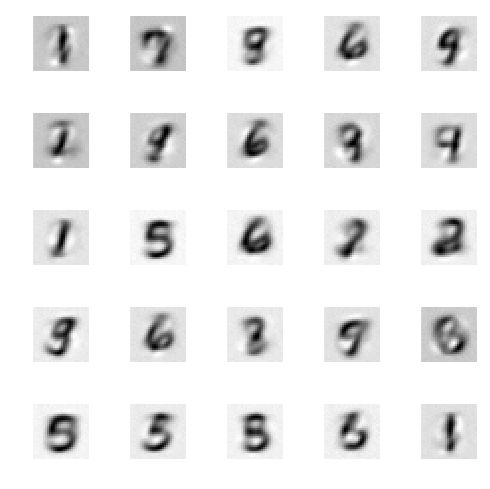

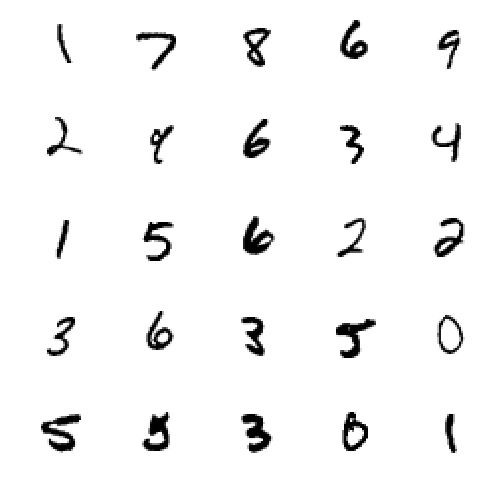

In [15]:
top_25 = [4909, 4767, 4797, 3362, 2019, 4801, 4761, 3382, 4727, 3607, 1448, 4226, 4875, 4114,  875,
 4885, 1420, 4841, 1618, 2748, 2773 ,4360 ,1480, 3266, 4729]
plt.figure(figsize=(5, 5))
n_rows = 5
n_cols = 5

for i in range(n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(reconstruction_2[top_25[i]].reshape(28, 28),
               interpolation="none", cmap="gray_r")
    plt.axis("off")
plt.tight_layout()
plt.show()


plt.figure(figsize=(5, 5))
n_rows = 5
n_cols = 5

for i in range(n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(test_dataset[top_25[i]].reshape(28, 28),
               interpolation="none", cmap="gray_r")
    plt.axis("off")
plt.tight_layout()
plt.show()

